**Transfer learning in image classification**


We will transfer learning and take pre trained model from google's Tensorflow hub and retrain that on flowers dataset using pre trained model saves lot of time and computational budget for new  classification problem at hard

In [36]:
import numpy as np
import cv2 
import PIL.Image as Image 
import os 

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub 

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [37]:
# make precision using ready made model(without any training)

IMAGE_SHAPE=(224,224)
classifier = tf.keras.Sequential([
                                  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=IMAGE_SHAPE+(3,))
])

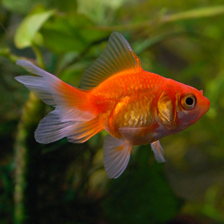

In [38]:
# we knw tht, there are 1000 classes, and goldfish are one of among

gold_fish=Image.open("/content/drive/MyDrive/goldfish.png").resize(IMAGE_SHAPE)
gold_fish

In [39]:
gold_fish=np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [40]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [41]:
result=classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [42]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [43]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels=[]
with open("/content/drive/MyDrive/ImageNetLabels.txt", "r") as f:
  image_labels=f.read().splitlines() 
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [44]:
image_labels[predicted_label_index]

'goldfish'

In [45]:
# load flowers dataset

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.',untar=True)


# cache dir indicates where to download data. I specified which means current directory
# untar true will unzip it

In [46]:
data_dir

'./datasets/flower_photos'

In [47]:
# pathlib is used to convert string path to windows path

import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [48]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/3026375835_a20ecdd140_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4292443009_3a2831b0b9_m.jpg'),
 PosixPath('datasets/flower_photos/roses/388405293_4db1d71f21_n.jpg'),
 PosixPath('datasets/flower_photos/roses/512578026_f6e6f2ad26.jpg'),
 PosixPath('datasets/flower_photos/roses/22506717337_0fd63e53e9.jpg')]

In [49]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [50]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3026375835_a20ecdd140_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4292443009_3a2831b0b9_m.jpg'),
 PosixPath('datasets/flower_photos/roses/388405293_4db1d71f21_n.jpg'),
 PosixPath('datasets/flower_photos/roses/512578026_f6e6f2ad26.jpg'),
 PosixPath('datasets/flower_photos/roses/22506717337_0fd63e53e9.jpg')]

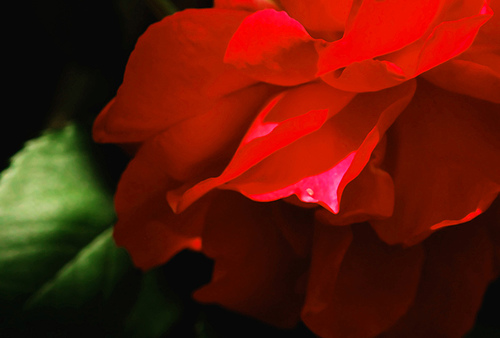

In [51]:
Image.open(str(roses[3]))

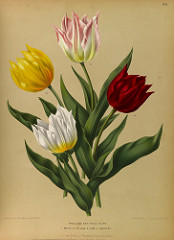

In [52]:
tulips=list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

In [53]:
# read flowers images from disk into numpy array using opencv

flowers_images_dict={
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [54]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4

    
}

In [55]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/3026375835_a20ecdd140_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4292443009_3a2831b0b9_m.jpg'),
 PosixPath('datasets/flower_photos/roses/388405293_4db1d71f21_n.jpg'),
 PosixPath('datasets/flower_photos/roses/512578026_f6e6f2ad26.jpg'),
 PosixPath('datasets/flower_photos/roses/22506717337_0fd63e53e9.jpg')]

In [56]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/3026375835_a20ecdd140_m.jpg'

In [57]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [58]:
img.shape

(240, 240, 3)

In [59]:
# bfr training make sure that all images are of same size
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [60]:
X,y =[],[]

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    # all the images should be in same dimensions.
    resized_img = cv2.resize(img,(224,224))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [61]:
X=np.array(X)
y=np.array(y)

In [62]:
# train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=0)

In [63]:
# preprocessing:scale images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [65]:
# make prediction using pre trainedmodel on new flowers datset

X[0].shape

(224, 224, 3)

In [66]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [69]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

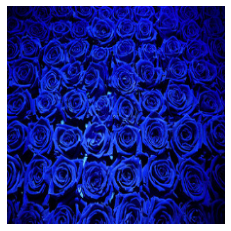

In [70]:
plt.axis('off')
plt.imshow(X[2])

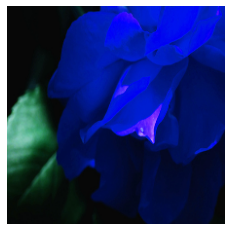

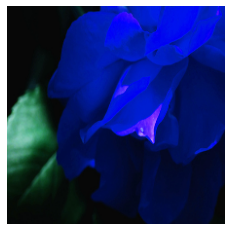

In [72]:
plt.axis('off')
plt.imshow(X[3])

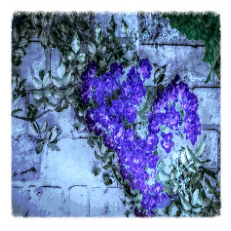

In [73]:
plt.axis('off')
plt.imshow(X[4])

In [74]:
predicted = classifier.predict(np.array([x0_resized, x1_resized,x2_resized]))
predicted = np.argmax(predicted,axis=1)
predicted

array([722, 795, 592])

In [75]:

image_labels[795]

'shower curtain'

In [76]:
# now take pre-trained model and rtrain it using flowers images

feature_extractor_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224,224,3), trainable=False)

In [77]:
num_of_flowers = 5
model=tf.keras.Sequential([
                           pretrained_model_without_top_layer,
                           tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_9 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [78]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 72s 791ms/step - loss: 0.7868 - acc: 0.7100
Epoch 2/5
86/86 [==============================] - 69s 801ms/step - loss: 0.4140 - acc: 0.8597
Epoch 3/5
86/86 [==============================] - 68s 796ms/step - loss: 0.3234 - acc: 0.8910
Epoch 4/5
86/86 [==============================] - 69s 798ms/step - loss: 0.2657 - acc: 0.9182
Epoch 5/5
86/86 [==============================] - 69s 797ms/step - loss: 0.2308 - acc: 0.9346


In [79]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 24s 785ms/step - loss: 0.3533 - acc: 0.8780


[0.3532670736312866, 0.8779956698417664]